In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr

%matplotlib inline

In [2]:
df_as = pd.read_csv("/Users/merryxmm7/Documents/GitHub/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")

In [78]:
df_as

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [19]:
#1 Crosstab Analysis between category and isBestSeller
# here we see the number of occurances of the best seller for each category
crosstab_result = pd.crosstab(df_as['category'], df_as['isBestSeller'])
# Sorting by the sum of values in each row 
crosstab_result_sorted = crosstab_result.loc[crosstab_result.sum(axis=1).sort_values(ascending=False).index]


isBestSeller,False,True
category,,
Sports & Outdoors,835935,330
Beauty,19010,302
"Handmade Clothing, Shoes & Accessories",19215,14
Bath & Body,19059,33
Birthday Gifts,18943,35


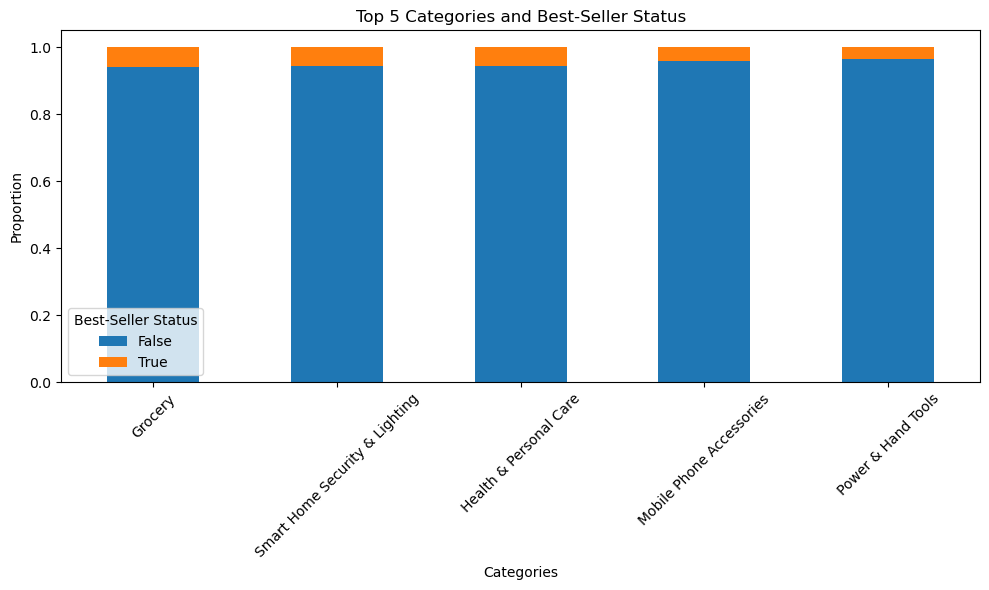

In [41]:
top_5_categories.plot(kind='bar', stacked=True, figsize=(10, 6)).legend(title='Best-Seller Status'); plt.title('Top 5 Categories and Best-Seller Status'); plt.xlabel('Categories'); plt.ylabel('Proportion'); plt.xticks(rotation=45); plt.tight_layout(); plt.show()


In [13]:
# Now we want to see the proportions so that qe can come to a conclusion and say if there are some categories where being 
# best seller is most prevalent 
# Calculate the row-wise sum
row_sums = crosstab_result.sum(axis=1)

# Divide each value in the crosstab result by the row sum to get proportions
proportions = crosstab_result.div(row_sums, axis=0)
sorted_proportions = proportions.sort_values(by=True, ascending=False)
sorted_proportions
# Grocery have the most best sellers in proportion to their sales

isBestSeller,False,True
category,,
Grocery,0.941865,0.058135
Smart Home Security & Lighting,0.942308,0.057692
Health & Personal Care,0.942314,0.057686
Mobile Phone Accessories,0.957529,0.042471
Power & Hand Tools,0.964661,0.035339
...,...,...
"CD, Disc & Tape Players",1.000000,0.000000
General Music-Making Accessories,1.000000,0.000000
Snowboard Boots,1.000000,0.000000


In [16]:
#2. Statistical tests
# Chi test
from scipy.stats import chi2_contingency
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [ ]:
# Since our p value is 0, the association between category and bestseller is statistical significant
# Therefore we reject the null-hypothesis and cocnlude that the categories are not independent of whether an item is a best seller or no

In [17]:
#2.1 Cramers V
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")
# we have a weak association but still stat significant between categories and best sellers

0.1222829439760564

<Axes: xlabel='category'>

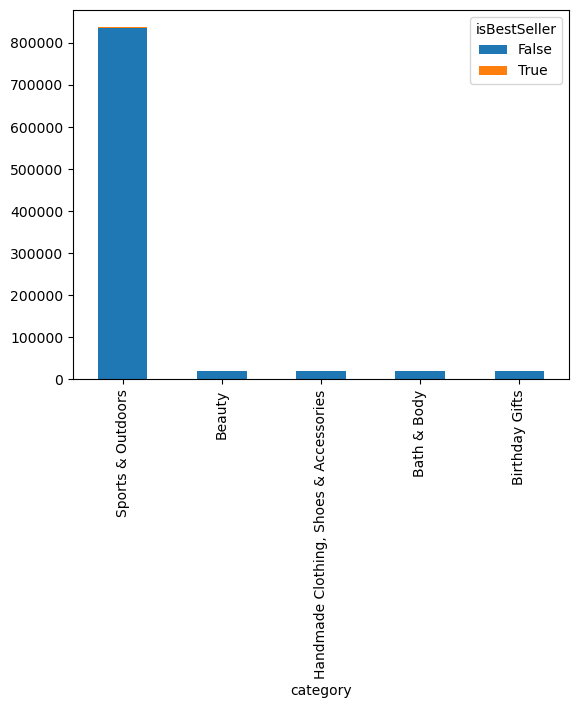

In [32]:
#3. Visualisations
top_5 = crosstab_result_sorted.head(5)
top_5.plot(kind="bar", stacked=True)

In [48]:
# Part 2
# 2.0 Preliminary Step: Remove outliers in product prices
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [52]:
df_prices = df_as["price"]
outliers = tukeys_test_outliers(df_prices)
outliers

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64

<Axes: xlabel='category', ylabel='price'>

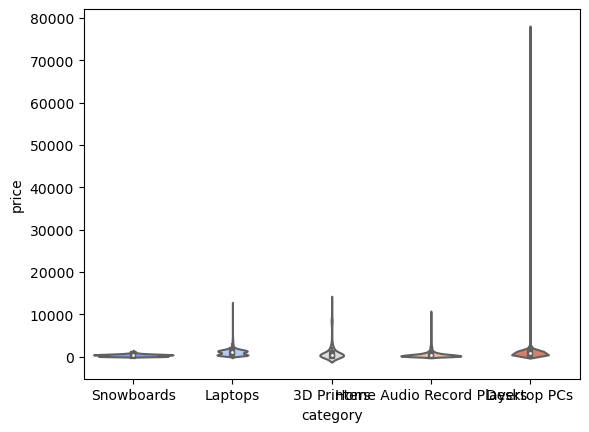

In [58]:
#violin plot
top_5_categories = df_as.groupby('category')['price'].median().nlargest(20).index
sns.violinplot(data=df_as[df_as['category'].isin(df_as.groupby('category')['price'].median().nlargest(5).index)], x='category', y='price', palette="coolwarm")


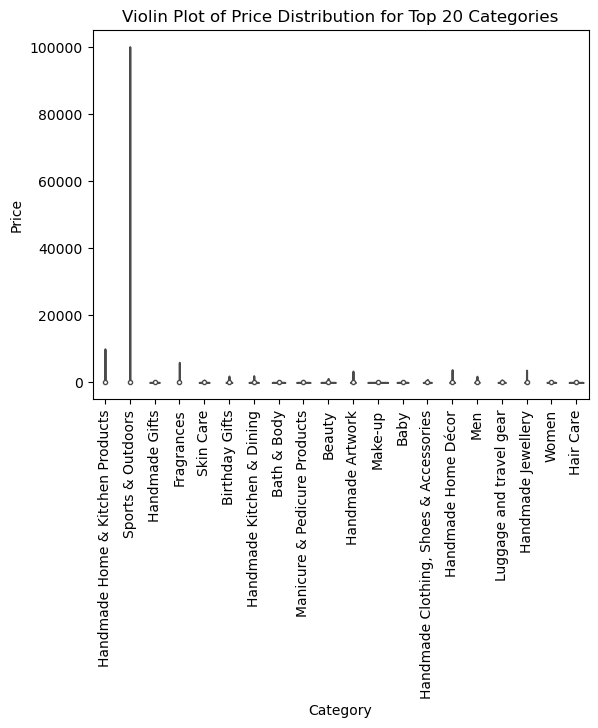

In [61]:
category_counts = df_as['category'].value_counts()
top_20_categories = category_counts.nlargest(20).index
df_top_20_categories = df_as[df_as['category'].isin(top_20_categories)]
sns.violinplot(data=df_top_20_categories, x='category', y='price', palette="coolwarm"); plt.title('Violin Plot of Price Distribution for Top 20 Categories'); plt.xlabel('Category'); plt.ylabel('Price'); plt.xticks(rotation=90); plt.show()


In [67]:
category_counts = df_as['category'].value_counts()

# Select the top 20 categories based on count
top_20_categories = category_counts.nlargest(10).index

# Filter the DataFrame to include only products from the top 20 categories
df_top_20_categories = df_as[df_as['category'].isin(top_20_categories)]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Fragrances'),
  Text(2, 0, 'Skin Care'),
  Text(3, 0, 'Birthday Gifts'),
  Text(4, 0, 'Bath & Body'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Beauty'),
  Text(7, 0, 'Make-up'),
  Text(8, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(9, 0, 'Hair Care')])

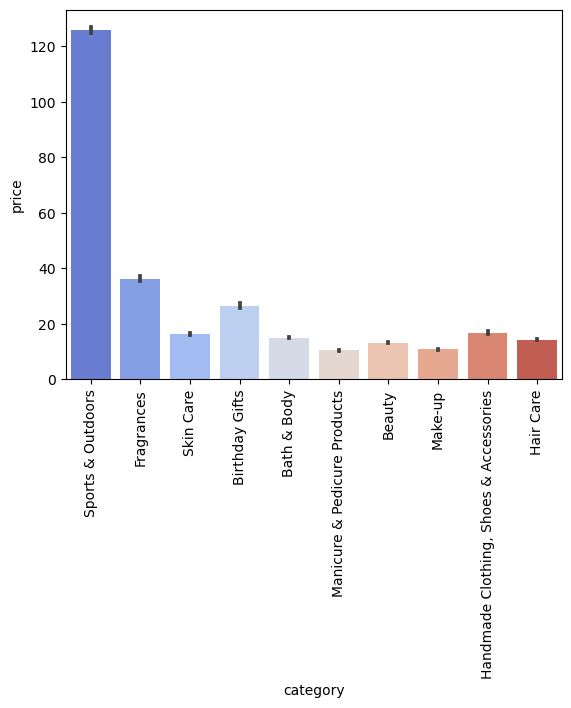

In [71]:
sns.barplot(data=df_top_20_categories, x='category', y='price', palette="coolwarm")
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Fragrances'),
  Text(2, 0, 'Birthday Gifts'),
  Text(3, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(4, 0, 'Skin Care'),
  Text(5, 0, 'Bath & Body'),
  Text(6, 0, 'Hair Care'),
  Text(7, 0, 'Beauty'),
  Text(8, 0, 'Make-up'),
  Text(9, 0, 'Manicure & Pedicure Products')])

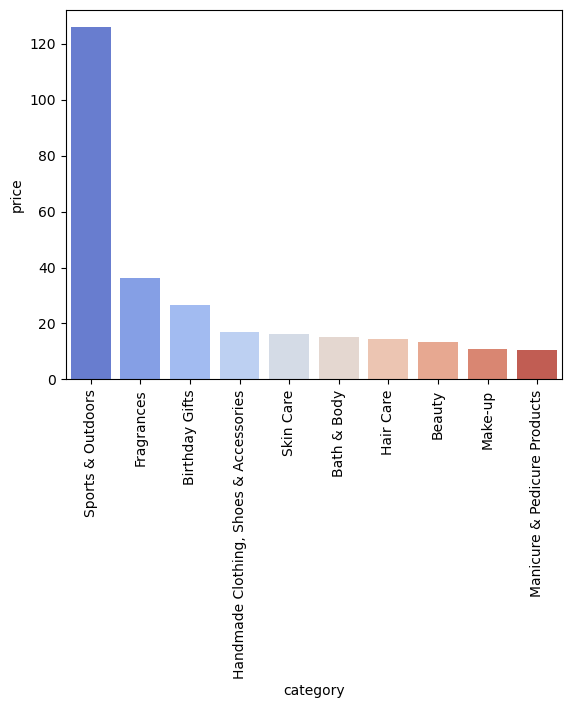

In [85]:
category_counts = df_as['category'].value_counts()

# Select the top 10 categories based on count
top_10_categories = category_counts.nlargest(10).index

# Filter the DataFrame to include only products from the top 10 categories
df_top_10_categories = df_as[df_as['category'].isin(top_10_categories)]

# Calculate the average price for each category
average_prices = df_top_10_categories.groupby('category')['price'].mean().sort_values(ascending=False).reset_index()

sns.barplot(data=average_prices, x='category', y='price', palette="coolwarm")
plt.xticks(rotation = 90)


In [75]:
# Calculate the average price for each category
average_prices_all_categories = df_as.groupby('category')['price'].mean().sort_values(ascending=False)

# Find the category with the highest average price
highest_average_price_category = average_prices_all_categories.idxmax()
highest_average_price_category

'Laptops'

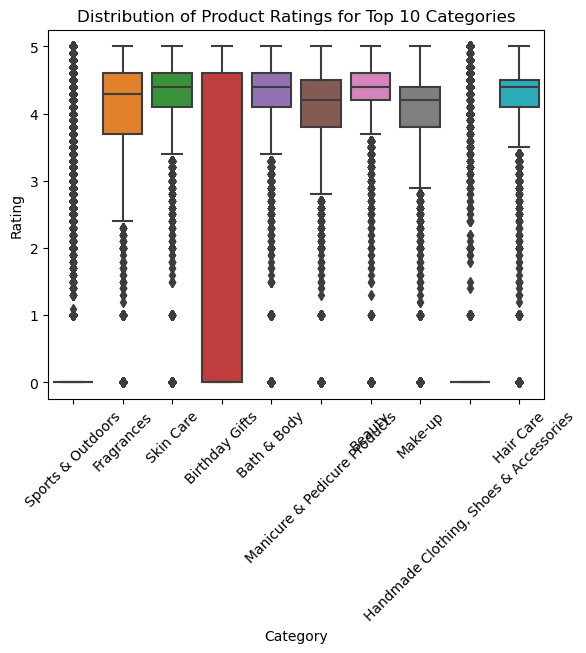

KeyError: 'Column not found: rating'

In [79]:
category_counts = df_as['category'].value_counts()

# Select the top 10 categories based on count
top_10_categories = category_counts.nlargest(10).index

# Filter the DataFrame to include only products from the top 10 categories
df_top_10_categories = df_as[df_as['category'].isin(top_10_categories)]
category_counts = df_as['category'].value_counts(); top_10_categories = category_counts.nlargest(10).index; df_top_10_categories = df_as[df_as['category'].isin(top_10_categories)]; sns.boxplot(data=df_top_10_categories, x='category', y='stars'); plt.title('Distribution of Product Ratings for Top 10 Categories'); plt.xlabel('Category'); plt.ylabel('Rating'); plt.xticks(rotation=45); plt.show(); highest_median_rating_category = df_as.groupby('category')['rating'].median().idxmax(); print("The product category with the highest median rating is:", highest_median_rating_category)


In [87]:
#3 correlation between prices and rating 
correlation_coefficient = df_as['price'].corr(df_as['stars'])
correlation_coefficient
# negative so the higer the price the less the rating

-0.12490673262148386

In [92]:
correlation_coefficient, p_value = pearsonr(df_as['price'], df_as['stars'])

print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a significant correlation between product price and its rating.")
else:
    print("There is no significant correlation between product price and its rating.")


Correlation Coefficient: -0.124906732623212
P-value: 0.0
There is a significant correlation between product price and its rating.
